In [1]:
from torchvision import models, transforms
from torchsummary import summary
import torch
import numpy as np
import cv2
import PIL
import matplotlib.pyplot as plt

import sys
import os

current_dir = os.getcwd()
sys.path.append(os.path.dirname(current_dir))

from lib.src import *
from lib.utils import *

from pytorch_grad_cam import GradCAM, HiResCAM, AblationCAM, ScoreCAM, GradCAMPlusPlus, XGradCAM
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
from pytorch_grad_cam.utils.image import show_cam_on_image
from torchvision.models import resnet50

2024-12-18 19:44:18.039374: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-18 19:44:18.251398: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1734547458.328843   71790 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1734547458.357001   71790 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-18 19:44:18.590349: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [2]:
DICT[153]

(153, 'n02085936', 'maltese_dog')

In [3]:
"""IMAGE = get_image_torch('images/malt_dogs.jpg', 224, 224)
MODEL = resnet50(pretrained=True)
TARGET_LAYER = MODEL.layer4[-1].conv3
CLASS = 153
CAM_FUNCTION = get_cam

CAM = CAM_FUNCTION(IMAGE, MODEL, TARGET_LAYER, CLASS)

overlay_plot_torch(IMAGE, CAM, 0.5, 'pres/cam_double_malt_dogs.jpg')"""

"IMAGE = get_image_torch('images/malt_dogs.jpg', 224, 224)\nMODEL = resnet50(pretrained=True)\nTARGET_LAYER = MODEL.layer4[-1].conv3\nCLASS = 153\nCAM_FUNCTION = get_cam\n\nCAM = CAM_FUNCTION(IMAGE, MODEL, TARGET_LAYER, CLASS)\n\noverlay_plot_torch(IMAGE, CAM, 0.5, 'pres/cam_double_malt_dogs.jpg')"

/home/jakub/Documents/Tasks/final/grad-cam/.venv/lib/python3.12/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/jakub/Documents/Tasks/final/grad-cam/.venv/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


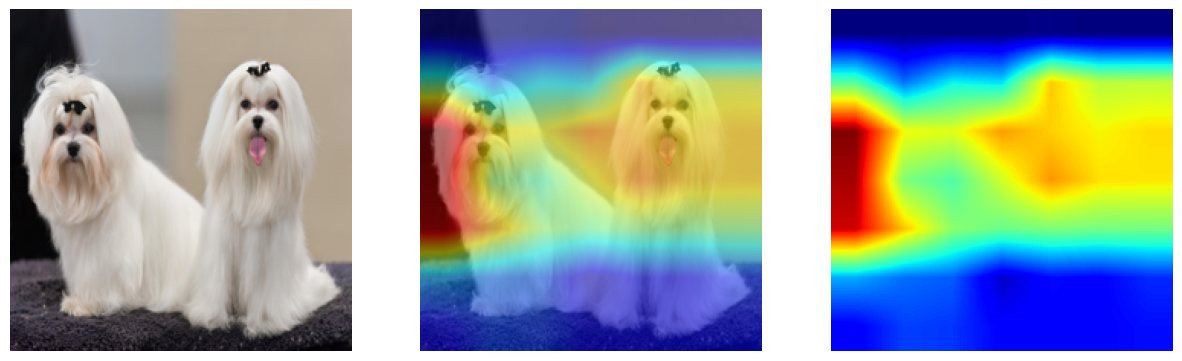

In [4]:
IMAGE = get_image_torch('images/malt_dogs.jpg', 224, 224)
MODEL = resnet50(pretrained=True)
TARGET_LAYER = MODEL.layer4[-1].conv3
CLASS = 153
CAM_FUNCTION = get_gradcam

CAM = CAM_FUNCTION(IMAGE, MODEL, TARGET_LAYER, CLASS)

overlay_plot_torch(IMAGE, CAM, 0.5, 'pres/gradcam_double_malt_dogs.jpg')

In [5]:
CAM[:, 0]

array([0.        , 0.45502356, 0.99999994, 0.9685408 , 0.9332451 ,
       0.29445326, 0.11448615], dtype=float32)

/home/jakub/Documents/Tasks/final/grad-cam/.venv/lib/python3.12/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/jakub/Documents/Tasks/final/grad-cam/.venv/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


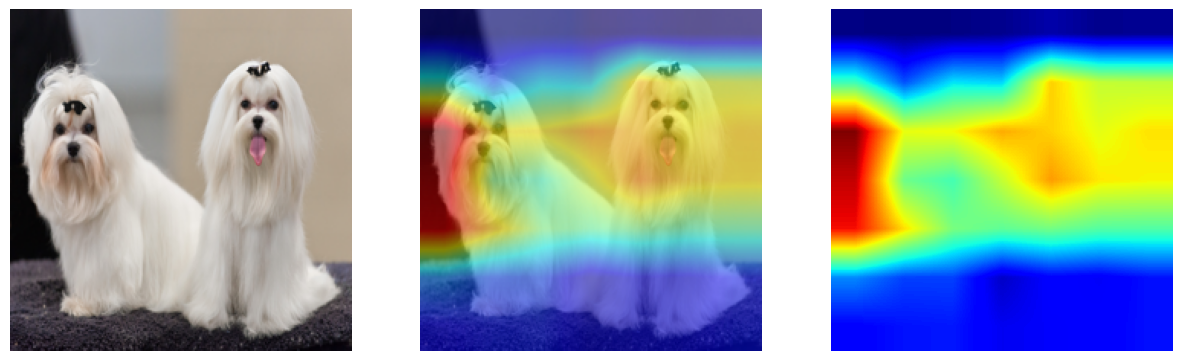

In [6]:
IMAGE = get_image_torch('images/malt_dogs.jpg', 224, 224)
MODEL = resnet50(pretrained=True)
TARGET_LAYER = MODEL.layer4[-1].conv3
CLASS = 153
CAM_FUNCTION = get_hirescam

CAM = CAM_FUNCTION(IMAGE, MODEL, TARGET_LAYER, CLASS)

overlay_plot_torch(IMAGE, CAM, 0.5, 'pres/hirescam_double_malt_dogs.jpg')

/home/jakub/Documents/Tasks/final/grad-cam/.venv/lib/python3.12/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/jakub/Documents/Tasks/final/grad-cam/.venv/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


[]

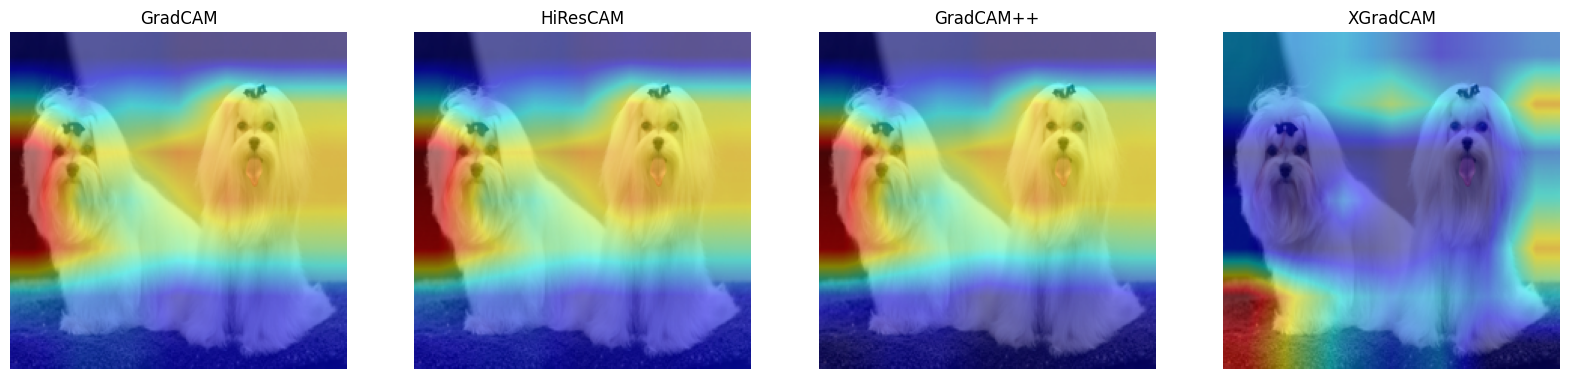

In [7]:
fig, axs = plt.subplots(1, 4)
fig.set_size_inches(20, 5)

IMAGE = get_image_torch('images/malt_dogs.jpg', 224, 224)

MODEL = resnet50(pretrained=True)
TARGET_LAYER = MODEL.layer4[-1].conv3
CLASS = 153

GRAD_CAM = get_gradcam(IMAGE, MODEL, TARGET_LAYER, CLASS)
GRAD_CAM_PLUS_PLUS = get_gradcamplusplus(IMAGE, MODEL, TARGET_LAYER, CLASS)
X_GRAD_CAM = get_xgradcam(IMAGE, MODEL, TARGET_LAYER, CLASS)
HIRES_CAM = get_hirescam(IMAGE, MODEL, TARGET_LAYER, CLASS)

IMAGE = IMAGE.permute(1, 2, 0).numpy()
IMAGE = cv2.normalize(IMAGE, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

GRAD_CAM = cv2.resize(GRAD_CAM, (224, 224))
GRAD_CAM = cv2.normalize(GRAD_CAM, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
GRAD_CAM = 255 - GRAD_CAM
GRAD_CAM_HEATMAP = cv2.applyColorMap(GRAD_CAM, cv2.COLORMAP_JET)
GRAD_CAM = cv2.addWeighted(IMAGE, 0.5, GRAD_CAM_HEATMAP, 0.5, 0)


GRAD_CAM_PLUS_PLUS = cv2.resize(GRAD_CAM_PLUS_PLUS, (224, 224))
GRAD_CAM_PLUS_PLUS = cv2.normalize(GRAD_CAM_PLUS_PLUS, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
GRAD_CAM_PLUS_PLUS = 255 - GRAD_CAM_PLUS_PLUS
GRAD_CAM_PLUS_PLUS_HEATMAP = cv2.applyColorMap(GRAD_CAM_PLUS_PLUS, cv2.COLORMAP_JET)
GRAD_CAM_PLUS_PLUS = cv2.addWeighted(IMAGE, 0.5, GRAD_CAM_PLUS_PLUS_HEATMAP, 0.5, 0)

X_GRAD_CAM = cv2.resize(X_GRAD_CAM, (224, 224))
X_GRAD_CAM = cv2.normalize(X_GRAD_CAM, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
X_GRAD_CAM = 255 - X_GRAD_CAM
X_GRAD_CAM_HEATMAP = cv2.applyColorMap(X_GRAD_CAM, cv2.COLORMAP_JET)
X_GRAD_CAM = cv2.addWeighted(IMAGE, 0.5, X_GRAD_CAM_HEATMAP, 0.5, 0)

HIRES_CAM = cv2.resize(HIRES_CAM, (224, 224))
HIRES_CAM = cv2.normalize(HIRES_CAM, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
HIRES_CAM = 255 - HIRES_CAM
HIRES_CAM_HEATMAP = cv2.applyColorMap(HIRES_CAM, cv2.COLORMAP_JET)
HIRES_CAM = cv2.addWeighted(IMAGE, 0.5, HIRES_CAM_HEATMAP, 0.5, 0)


axs[0].imshow(GRAD_CAM)
axs[0].axis('off')
axs[0].set_title('GradCAM')

axs[1].imshow(HIRES_CAM)
axs[1].axis('off')
axs[1].set_title('HiResCAM')

axs[2].imshow(GRAD_CAM_PLUS_PLUS)
axs[2].axis('off')
axs[2].set_title('GradCAM++')

axs[3].imshow(X_GRAD_CAM)
axs[3].axis('off')
axs[3].set_title('XGradCAM')

plt.plot()

[]

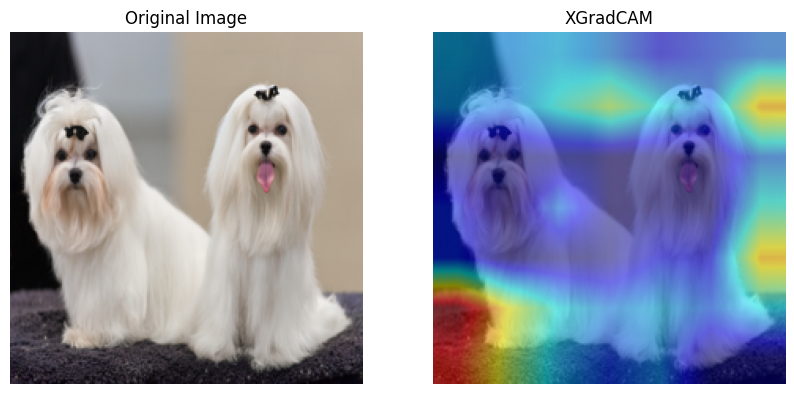

In [8]:
model = resnet50(pretrained=True)
target_layers = [model.layer4[-1].conv3]
input_tensor = get_image_torch('images/malt_dogs.jpg', 224, 224).unsqueeze(0)
targets = [ClassifierOutputTarget(CLASS)]

with XGradCAM(model=model, target_layers=target_layers) as cam:
    X_GRAD_CAM = cam(input_tensor=input_tensor, targets=targets).squeeze(0)

fig, axs = plt.subplots(1, 2)
fig.set_size_inches(10, 5)

IMAGE = get_image_torch('images/malt_dogs.jpg', 224, 224)
IMAGE = IMAGE.permute(1, 2, 0).numpy()
IMAGE = cv2.normalize(IMAGE, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

X_GRAD_CAM = cv2.resize(X_GRAD_CAM, (224, 224))
X_GRAD_CAM = cv2.normalize(X_GRAD_CAM, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
X_GRAD_CAM = 255 - X_GRAD_CAM
X_GRAD_CAM_HEATMAP = cv2.applyColorMap(X_GRAD_CAM, cv2.COLORMAP_JET)
X_GRAD_CAM = cv2.addWeighted(IMAGE, 0.5, X_GRAD_CAM_HEATMAP, 0.5, 0)

axs[0].imshow(IMAGE)
axs[0].axis('off')
axs[0].set_title('Original Image')

axs[1].imshow(X_GRAD_CAM)
axs[1].axis('off')
axs[1].set_title('XGradCAM')

plt.plot()

In [9]:
"""fig, axs = plt.subplots(1, 2)
fig.set_size_inches(20, 5)

IMAGE = get_image_torch('images/malt_dogs.jpg', 224, 224)

MODEL = resnet50(pretrained=True)
TARGET_LAYER = MODEL.layer4[-1].conv3
CLASS = 153

AB_CAM = get_ablationcam(IMAGE, MODEL, TARGET_LAYER, CLASS)
SCORE_CAM = get_scorecam(IMAGE, MODEL, TARGET_LAYER, CLASS)

IMAGE = IMAGE.permute(1, 2, 0).numpy()
IMAGE = cv2.normalize(IMAGE, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

AB_CAM = cv2.resize(AB_CAM, (224, 224))
AB_CAM = cv2.normalize(AB_CAM, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
AB_CAM = 255 - AB_CAM
AB_CAM_HEATMAP = cv2.applyColorMap(AB_CAM, cv2.COLORMAP_JET)
AB_CAM = cv2.addWeighted(IMAGE, 0.5, AB_CAM_HEATMAP, 0.5, 0)

SCORE_CAM = cv2.resize(SCORE_CAM, (224, 224))
SCORE_CAM = cv2.normalize(SCORE_CAM, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
SCORE_CAM = 255 - SCORE_CAM
SCORE_CAM_HEATMAP = cv2.applyColorMap(SCORE_CAM, cv2.COLORMAP_JET)
SCORE_CAM = cv2.addWeighted(IMAGE, 0.5, SCORE_CAM_HEATMAP, 0.5, 0)

axs[0].imshow(AB_CAM)
axs[0].axis('off')
axs[0].set_title('AblationCAM')

axs[1].imshow(SCORE_CAM)
axs[1].axis('off')
axs[1].set_title('ScoreCAM')

plt.plot()"""

"fig, axs = plt.subplots(1, 2)\nfig.set_size_inches(20, 5)\n\nIMAGE = get_image_torch('images/malt_dogs.jpg', 224, 224)\n\nMODEL = resnet50(pretrained=True)\nTARGET_LAYER = MODEL.layer4[-1].conv3\nCLASS = 153\n\nAB_CAM = get_ablationcam(IMAGE, MODEL, TARGET_LAYER, CLASS)\nSCORE_CAM = get_scorecam(IMAGE, MODEL, TARGET_LAYER, CLASS)\n\nIMAGE = IMAGE.permute(1, 2, 0).numpy()\nIMAGE = cv2.normalize(IMAGE, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)\n\nAB_CAM = cv2.resize(AB_CAM, (224, 224))\nAB_CAM = cv2.normalize(AB_CAM, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)\nAB_CAM = 255 - AB_CAM\nAB_CAM_HEATMAP = cv2.applyColorMap(AB_CAM, cv2.COLORMAP_JET)\nAB_CAM = cv2.addWeighted(IMAGE, 0.5, AB_CAM_HEATMAP, 0.5, 0)\n\nSCORE_CAM = cv2.resize(SCORE_CAM, (224, 224))\nSCORE_CAM = cv2.normalize(SCORE_CAM, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)\nSCORE_CAM = 255 - SCORE_CAM\nSCORE_CAM_HEATMAP = cv2.applyColorMap(SCORE_CAM, cv2.COLORMAP_JET)\nSCORE_CAM = cv2.addWeighted(IMAGE, 0.5, SCOR

[]

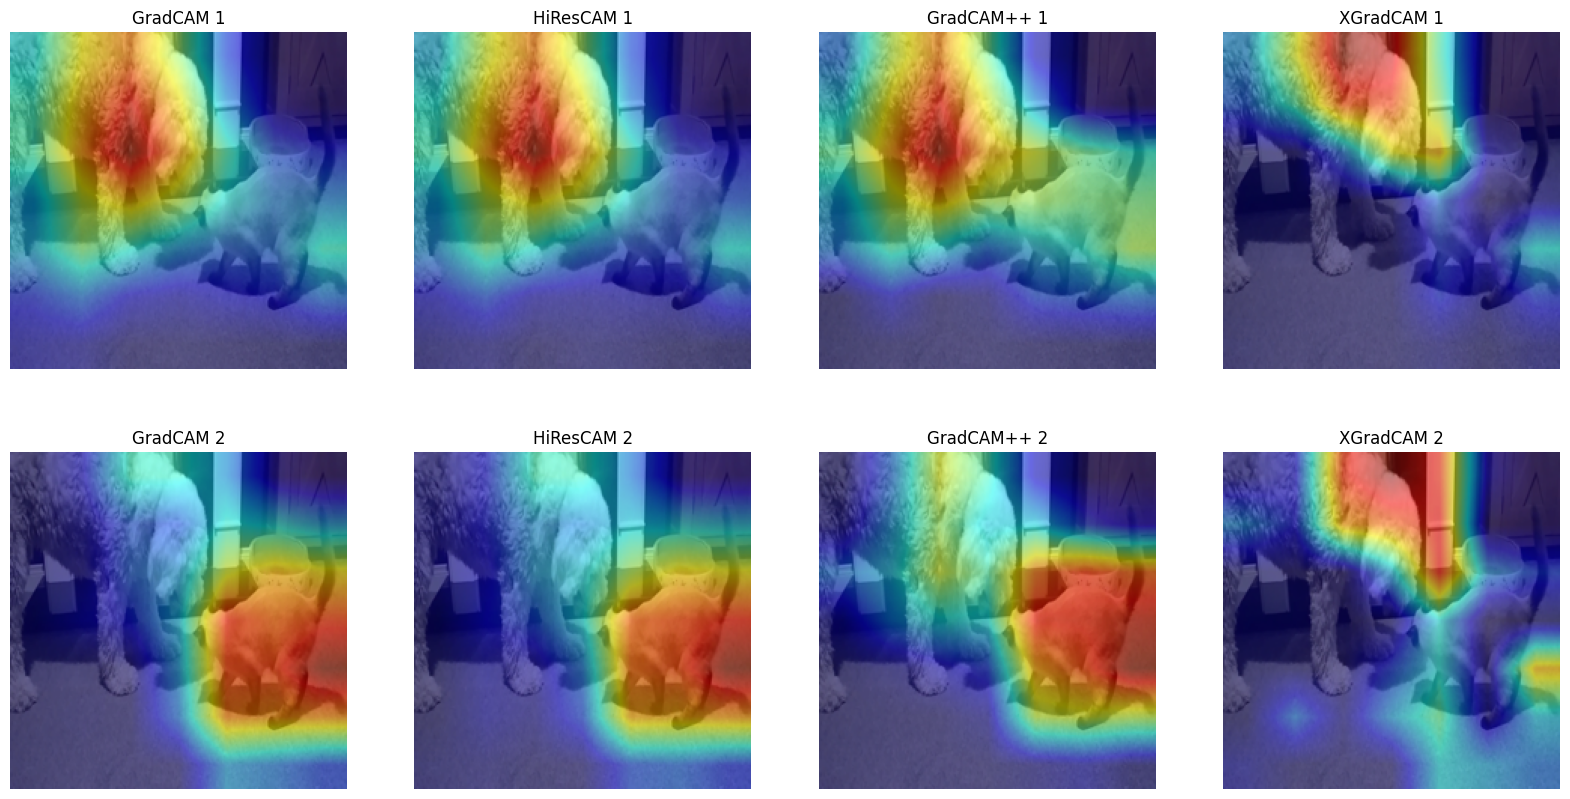

In [10]:
fig, axs = plt.subplots(2, 4)
fig.set_size_inches(20, 10)

CLASS1 = 229
CLASS2 = 284

MODEL = resnet50(pretrained=True)
TARGET_LAYER = MODEL.layer4[-1].conv3

IMAGE = get_image_torch('images/dog_s_dog.jpg', 224, 224)

GRAD_CAM_1 = get_gradcam(IMAGE, MODEL, TARGET_LAYER, CLASS1)
GRAD_CAM_2 = get_gradcam(IMAGE, MODEL, TARGET_LAYER, CLASS2)

GRAD_CAM_PLUS_PLUS_1 = get_gradcamplusplus(IMAGE, MODEL, TARGET_LAYER, CLASS1)
GRAD_CAM_PLUS_PLUS_2 = get_gradcamplusplus(IMAGE, MODEL, TARGET_LAYER, CLASS2)

X_GRAD_CAM_1 = get_xgradcam(IMAGE, MODEL, TARGET_LAYER, CLASS1)
X_GRAD_CAM_2 = get_xgradcam(IMAGE, MODEL, TARGET_LAYER, CLASS2)

HIRES_CAM_1 = get_hirescam(IMAGE, MODEL, TARGET_LAYER, CLASS1)
HIRES_CAM_2 = get_hirescam(IMAGE, MODEL, TARGET_LAYER, CLASS2)

IMAGE = IMAGE.permute(1, 2, 0).numpy()
IMAGE = cv2.normalize(IMAGE, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

GRAD_CAM_1 = cv2.resize(GRAD_CAM_1, (224, 224))
GRAD_CAM_1 = cv2.normalize(GRAD_CAM_1, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
GRAD_CAM_1 = 255 - GRAD_CAM_1
GRAD_CAM_HEATMAP_1 = cv2.applyColorMap(GRAD_CAM_1, cv2.COLORMAP_JET)
GRAD_CAM_1 = cv2.addWeighted(IMAGE, 0.5, GRAD_CAM_HEATMAP_1, 0.5, 0)

GRAD_CAM_2 = cv2.resize(GRAD_CAM_2, (224, 224))
GRAD_CAM_2 = cv2.normalize(GRAD_CAM_2, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
GRAD_CAM_2 = 255 - GRAD_CAM_2
GRAD_CAM_HEATMAP_2 = cv2.applyColorMap(GRAD_CAM_2, cv2.COLORMAP_JET)
GRAD_CAM_2 = cv2.addWeighted(IMAGE, 0.5, GRAD_CAM_HEATMAP_2, 0.5, 0)

GRAD_CAM_PLUS_PLUS_1 = cv2.resize(GRAD_CAM_PLUS_PLUS_1, (224, 224))
GRAD_CAM_PLUS_PLUS_1 = cv2.normalize(GRAD_CAM_PLUS_PLUS_1, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
GRAD_CAM_PLUS_PLUS_1 = 255 - GRAD_CAM_PLUS_PLUS_1
GRAD_CAM_PLUS_PLUS_HEATMAP_1 = cv2.applyColorMap(GRAD_CAM_PLUS_PLUS_1, cv2.COLORMAP_JET)
GRAD_CAM_PLUS_PLUS_1 = cv2.addWeighted(IMAGE, 0.5, GRAD_CAM_PLUS_PLUS_HEATMAP_1, 0.5, 0)

GRAD_CAM_PLUS_PLUS_2 = cv2.resize(GRAD_CAM_PLUS_PLUS_2, (224, 224))
GRAD_CAM_PLUS_PLUS_2 = cv2.normalize(GRAD_CAM_PLUS_PLUS_2, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
GRAD_CAM_PLUS_PLUS_2 = 255 - GRAD_CAM_PLUS_PLUS_2
GRAD_CAM_PLUS_PLUS_HEATMAP_2 = cv2.applyColorMap(GRAD_CAM_PLUS_PLUS_2, cv2.COLORMAP_JET)
GRAD_CAM_PLUS_PLUS_2 = cv2.addWeighted(IMAGE, 0.5, GRAD_CAM_PLUS_PLUS_HEATMAP_2, 0.5, 0)

X_GRAD_CAM_1 = cv2.resize(X_GRAD_CAM_1, (224, 224))
X_GRAD_CAM_1 = cv2.normalize(X_GRAD_CAM_1, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
X_GRAD_CAM_1 = 255 - X_GRAD_CAM_1
X_GRAD_CAM_HEATMAP_1 = cv2.applyColorMap(X_GRAD_CAM_1, cv2.COLORMAP_JET)
X_GRAD_CAM_1 = cv2.addWeighted(IMAGE, 0.5, X_GRAD_CAM_HEATMAP_1, 0.5, 0)

X_GRAD_CAM_2 = cv2.resize(X_GRAD_CAM_2, (224, 224))
X_GRAD_CAM_2 = cv2.normalize(X_GRAD_CAM_2, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
X_GRAD_CAM_2 = 255 - X_GRAD_CAM_2
X_GRAD_CAM_HEATMAP_2 = cv2.applyColorMap(X_GRAD_CAM_2, cv2.COLORMAP_JET)
X_GRAD_CAM_2 = cv2.addWeighted(IMAGE, 0.5, X_GRAD_CAM_HEATMAP_2, 0.5, 0)

HIRES_CAM_1 = cv2.resize(HIRES_CAM_1, (224, 224))
HIRES_CAM_1 = cv2.normalize(HIRES_CAM_1, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
HIRES_CAM_1 = 255 - HIRES_CAM_1
HIRES_CAM_HEATMAP_1 = cv2.applyColorMap(HIRES_CAM_1, cv2.COLORMAP_JET)
HIRES_CAM_1 = cv2.addWeighted(IMAGE, 0.5, HIRES_CAM_HEATMAP_1, 0.5, 0)

HIRES_CAM_2 = cv2.resize(HIRES_CAM_2, (224, 224))
HIRES_CAM_2 = cv2.normalize(HIRES_CAM_2, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
HIRES_CAM_2 = 255 - HIRES_CAM_2
HIRES_CAM_HEATMAP_2 = cv2.applyColorMap(HIRES_CAM_2, cv2.COLORMAP_JET)
HIRES_CAM_2 = cv2.addWeighted(IMAGE, 0.5, HIRES_CAM_HEATMAP_2, 0.5, 0)

axs[0, 0].imshow(GRAD_CAM_1)
axs[0, 0].axis('off')
axs[0, 0].set_title('GradCAM 1')

axs[0, 1].imshow(HIRES_CAM_1)   
axs[0, 1].axis('off')
axs[0, 1].set_title('HiResCAM 1')

axs[0, 2].imshow(GRAD_CAM_PLUS_PLUS_1)
axs[0, 2].axis('off')
axs[0, 2].set_title('GradCAM++ 1')

axs[0, 3].imshow(X_GRAD_CAM_1)
axs[0, 3].axis('off')
axs[0, 3].set_title('XGradCAM 1')

axs[1, 0].imshow(GRAD_CAM_2)
axs[1, 0].axis('off')
axs[1, 0].set_title('GradCAM 2')

axs[1, 1].imshow(HIRES_CAM_2)
axs[1, 1].axis('off')
axs[1, 1].set_title('HiResCAM 2')

axs[1, 2].imshow(GRAD_CAM_PLUS_PLUS_2)
axs[1, 2].axis('off')
axs[1, 2].set_title('GradCAM++ 2')

axs[1, 3].imshow(X_GRAD_CAM_2)
axs[1, 3].axis('off')
axs[1, 3].set_title('XGradCAM 2')

plt.plot()

[]

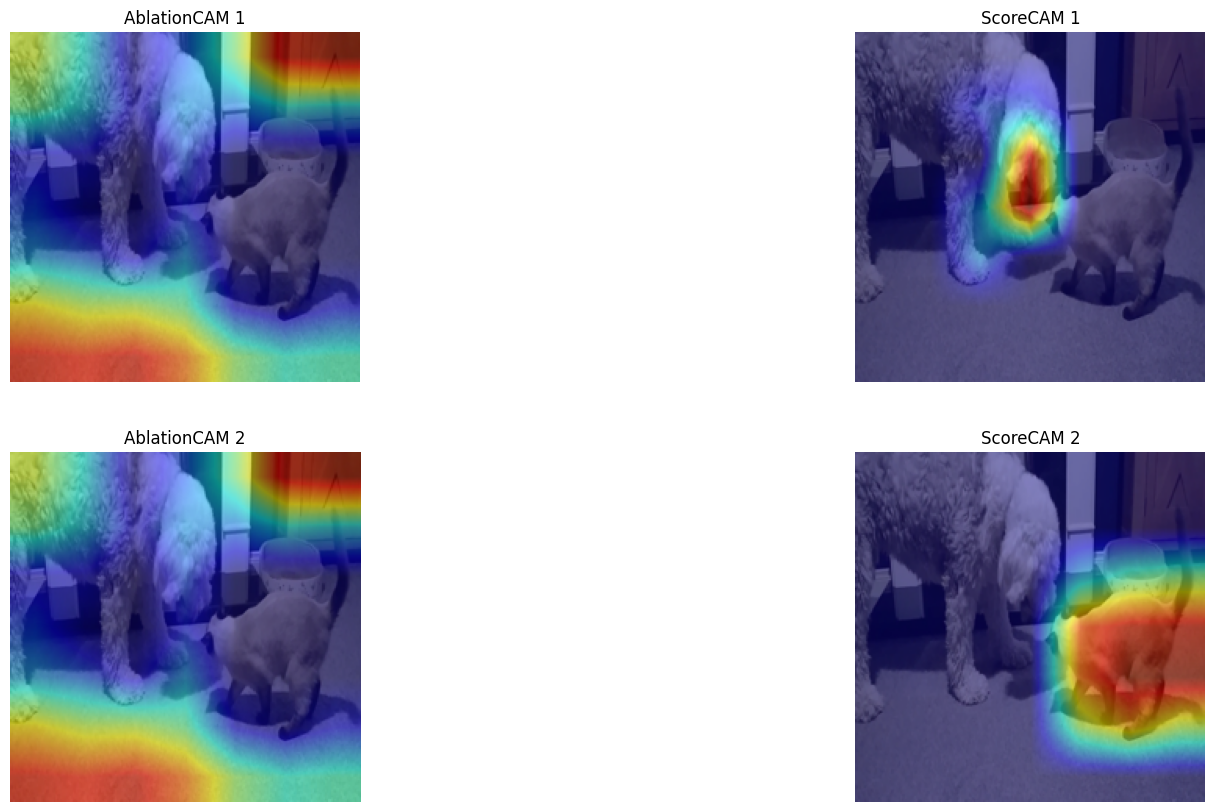

In [11]:
fig, axs = plt.subplots(2, 2)
fig.set_size_inches(20, 10)

CLASS1 = 229
CLASS2 = 284

MODEL = resnet50(pretrained=True)
TARGET_LAYER = MODEL.layer4[-1].conv3

IMAGE = get_image_torch('images/dog_s_dog.jpg', 224, 224)

AB_CAM_1 = get_ablationcam(IMAGE, MODEL, TARGET_LAYER, CLASS1)
AB_CAM_2 = get_ablationcam(IMAGE, MODEL, TARGET_LAYER, CLASS2)

SCORE_CAM_1 = get_scorecam(IMAGE, MODEL, TARGET_LAYER, CLASS1)
SCORE_CAM_2 = get_scorecam(IMAGE, MODEL, TARGET_LAYER, CLASS2)

IMAGE = IMAGE.permute(1, 2, 0).numpy()
IMAGE = cv2.normalize(IMAGE, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

AB_CAM_1 = cv2.resize(AB_CAM_1, (224, 224))
AB_CAM_1 = cv2.normalize(AB_CAM_1, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
AB_CAM_1 = 255 - AB_CAM_1
AB_CAM_HEATMAP_1 = cv2.applyColorMap(AB_CAM_1, cv2.COLORMAP_JET)
AB_CAM_1 = cv2.addWeighted(IMAGE, 0.5, AB_CAM_HEATMAP_1, 0.5, 0)

AB_CAM_2 = cv2.resize(AB_CAM_2, (224, 224))
AB_CAM_2 = cv2.normalize(AB_CAM_2, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
AB_CAM_2 = 255 - AB_CAM_2
AB_CAM_HEATMAP_2 = cv2.applyColorMap(AB_CAM_2, cv2.COLORMAP_JET)
AB_CAM_2 = cv2.addWeighted(IMAGE, 0.5, AB_CAM_HEATMAP_2, 0.5, 0)

SCORE_CAM_1 = cv2.resize(SCORE_CAM_1, (224, 224))
SCORE_CAM_1 = cv2.normalize(SCORE_CAM_1, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
SCORE_CAM_1 = 255 - SCORE_CAM_1
SCORE_CAM_HEATMAP_1 = cv2.applyColorMap(SCORE_CAM_1, cv2.COLORMAP_JET)
SCORE_CAM_1 = cv2.addWeighted(IMAGE, 0.5, SCORE_CAM_HEATMAP_1, 0.5, 0)

SCORE_CAM_2 = cv2.resize(SCORE_CAM_2, (224, 224))
SCORE_CAM_2 = cv2.normalize(SCORE_CAM_2, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
SCORE_CAM_2 = 255 - SCORE_CAM_2
SCORE_CAM_HEATMAP_2 = cv2.applyColorMap(SCORE_CAM_2, cv2.COLORMAP_JET)
SCORE_CAM_2 = cv2.addWeighted(IMAGE, 0.5, SCORE_CAM_HEATMAP_2, 0.5, 0)

axs[0, 0].imshow(AB_CAM_1)
axs[0, 0].axis('off')
axs[0, 0].set_title('AblationCAM 1')

axs[0, 1].imshow(SCORE_CAM_1)
axs[0, 1].axis('off')
axs[0, 1].set_title('ScoreCAM 1')

axs[1, 0].imshow(AB_CAM_2)
axs[1, 0].axis('off')
axs[1, 0].set_title('AblationCAM 2')

axs[1, 1].imshow(SCORE_CAM_2)
axs[1, 1].axis('off')
axs[1, 1].set_title('ScoreCAM 2')

plt.plot()

In [12]:
DICT[229], DICT[284]

((229, 'n02105641', 'old_english_sheepdog'), (284, 'n02123597', 'siamese_cat'))

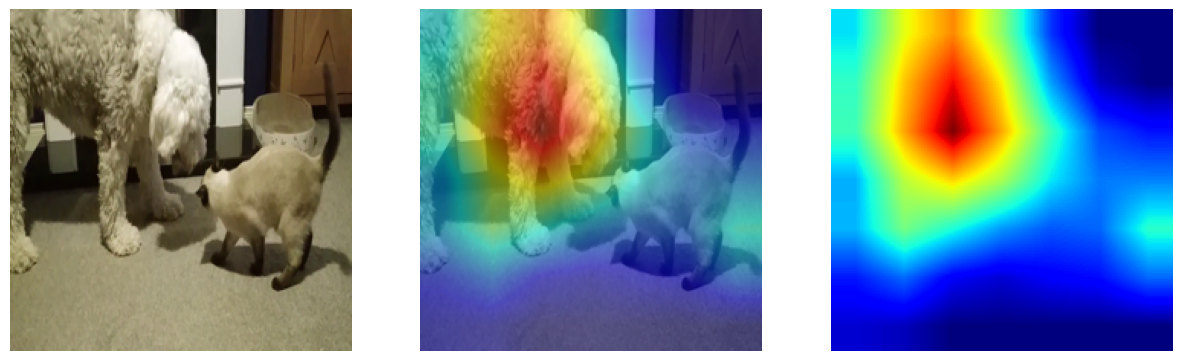

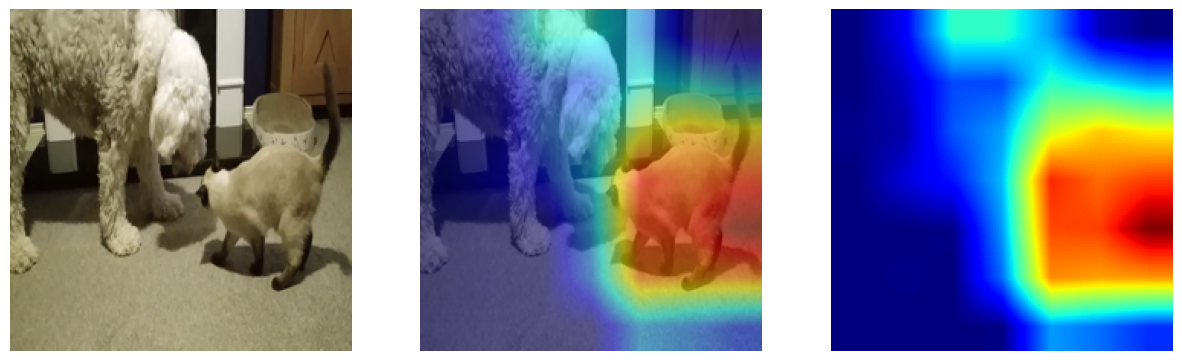

In [13]:
PERSIAN_CLASS = 229
SIAMESE_CLASS = 284

IMAGE = get_image_torch('images/dog_s_dog.jpg', 224, 224)
MODEL = resnet50(pretrained=True)
TARGET_LAYER = MODEL.layer4[-1].conv3
CAM_FUNCTION = get_gradcam

CAM = CAM_FUNCTION(IMAGE, MODEL, TARGET_LAYER, PERSIAN_CLASS)

overlay_plot_torch(IMAGE, CAM, 0.5, 'pres/gradcam_dog_from_dog_and_cat')

CAM = CAM_FUNCTION(IMAGE, MODEL, TARGET_LAYER, SIAMESE_CLASS)

overlay_plot_torch(IMAGE, CAM, 0.5, 'pres/gradcam_cat_from_dog_and_cat')

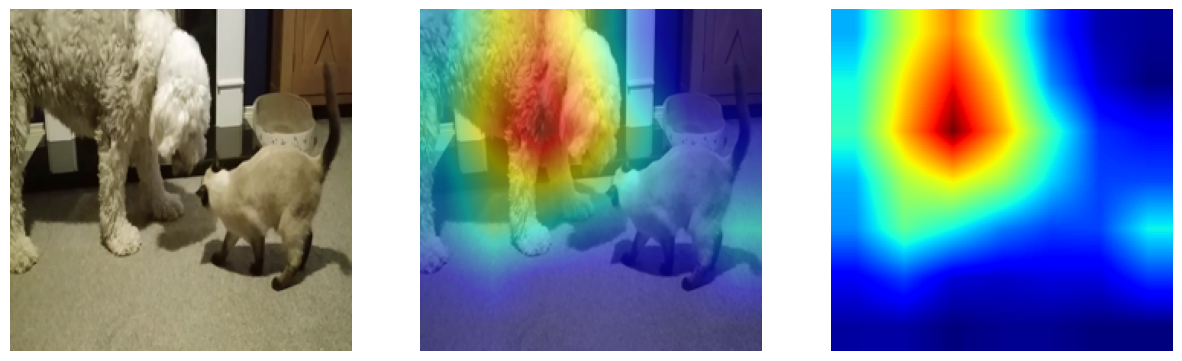

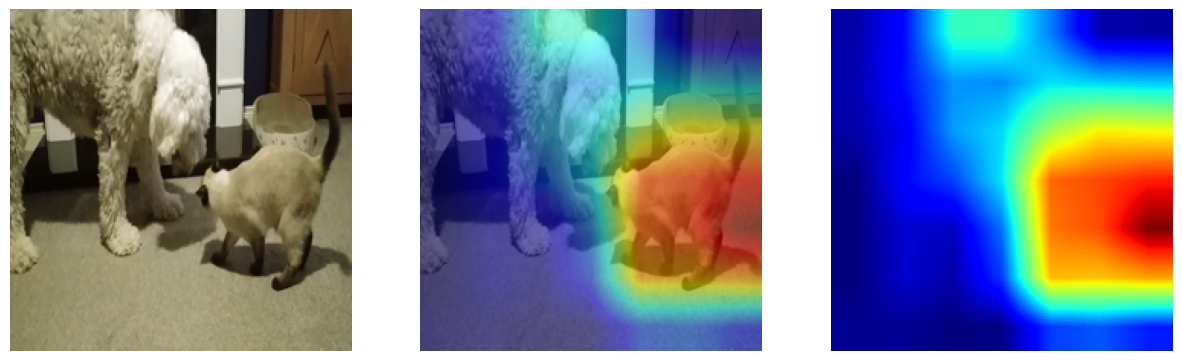

In [14]:
PERSIAN_CLASS = 229
SIAMESE_CLASS = 284

IMAGE = get_image_torch('images/dog_s_dog.jpg', 224, 224)
MODEL = resnet50(pretrained=True)
TARGET_LAYER = MODEL.layer4[-1].conv3
CAM_FUNCTION = get_hirescam

CAM = CAM_FUNCTION(IMAGE, MODEL, TARGET_LAYER, PERSIAN_CLASS)

overlay_plot_torch(IMAGE, CAM, 0.5, 'pres/hirescam_dog_from_dog_and_cat')

CAM = CAM_FUNCTION(IMAGE, MODEL, TARGET_LAYER, SIAMESE_CLASS)

overlay_plot_torch(IMAGE, CAM, 0.5, 'pres/hirescam_cat_from_dog_and_cat')

In [15]:
"""PERSIAN_CLASS = 229
SIAMESE_CLASS = 284

IMAGE = get_image_torch('images/dog_s_dog.jpg', 224, 224)
MODEL = resnet50(pretrained=True)
TARGET_LAYER = MODEL.layer4[-1].conv3
CAM_FUNCTION = get_cam

CAM = CAM_FUNCTION(IMAGE, MODEL, TARGET_LAYER, PERSIAN_CLASS)

overlay_plot_torch(IMAGE, CAM, 0.5, 'pres/cam_dog_from_dog_and_cat')

CAM = CAM_FUNCTION(IMAGE, MODEL, TARGET_LAYER, SIAMESE_CLASS)

overlay_plot_torch(IMAGE, CAM, 0.5, 'pres/cam_cat_from_dog_and_cat')"""

"PERSIAN_CLASS = 229\nSIAMESE_CLASS = 284\n\nIMAGE = get_image_torch('images/dog_s_dog.jpg', 224, 224)\nMODEL = resnet50(pretrained=True)\nTARGET_LAYER = MODEL.layer4[-1].conv3\nCAM_FUNCTION = get_cam\n\nCAM = CAM_FUNCTION(IMAGE, MODEL, TARGET_LAYER, PERSIAN_CLASS)\n\noverlay_plot_torch(IMAGE, CAM, 0.5, 'pres/cam_dog_from_dog_and_cat')\n\nCAM = CAM_FUNCTION(IMAGE, MODEL, TARGET_LAYER, SIAMESE_CLASS)\n\noverlay_plot_torch(IMAGE, CAM, 0.5, 'pres/cam_cat_from_dog_and_cat')"